## Model Optimization

* After running the same hyperparamter tuner model (all inputs and setting the same), our initial EDA identified that utilizing a dataset with replaced cholesterol values would lead to the highest possible accuracy. We then decided to utilize that dataset and try to optimize using keras sequential modeling. This allowed us to have more control over the architecture of each attempt and manually change the number of layers, neurons, activation functions and epochs.

In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Creating initial machine learning model as baseline
# Importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt


In [2]:
# Create a path reference to the file 
heart_path_replaced = Path("resources/heart_replaced_values.csv")



# Read CSV into DataFrame
df_replaced = pd.read_csv(heart_path_replaced, delimiter=",")

In [3]:
# Split our preprocessed data into our features and target arrays
y = df_replaced['HeartDisease']
X = df_replaced.drop(columns='HeartDisease')

In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
X= pd.get_dummies(X)
# Drop the non-beneficial ID columns, 'HeartDisease'.

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [5]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
X_train.shape

(734, 20)

## Attempt 4 - 85.33% accuracy, 40.11% loss

### Base Sequential Model
* This model was created by attempting to mirror the optimal model that came out of our hyperparamter tuning attempt #3
* Utilized 6 hidden layers with the tanh activation function and a sigmoid output layer. Resulting accuracy of a little over 85% was not as good as attempt #3.

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1


nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
model_4 = nn_model_4.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.6439 - loss: 0.6911 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5305 - loss: 0.6880
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.5630 - loss: 0.6833
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.5662 - loss: 0.6767
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.5454 - loss: 0.6727
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.5592 - loss: 0.6639
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.5420 - loss: 0.6581
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.6680 - loss: 0.6507
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8648 - loss: 0.6362
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8776 - loss: 0.6289
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8692 - loss: 0.6194
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/ste

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 8ms/step - accuracy: 0.8315 - loss: 0.5407
Loss: 0.540654718875885, Accuracy: 0.83152174949646


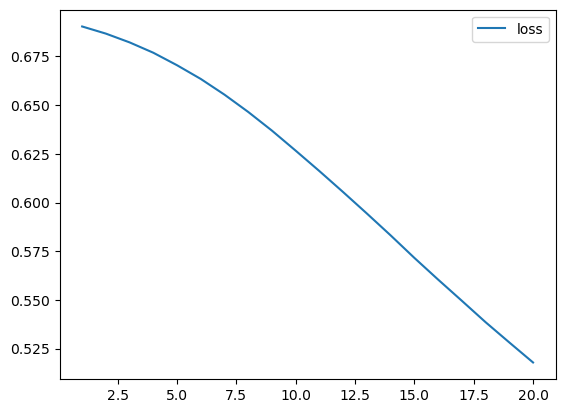

In [12]:
# Create a DataFrame containing training history
a4_df = pd.DataFrame(model_4.history)

# Increase the index by 1 to match the number of epochs
a4_df.index += 1

# Plot the loss
a4_df.plot(y="loss")
plt.show()

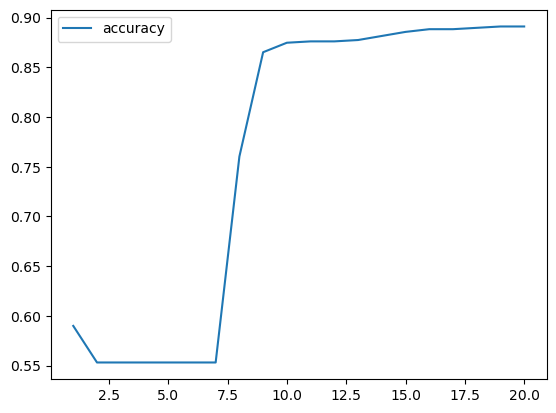

In [13]:
# Plot the accuracy
a4_df.plot(y="accuracy")
plt.show()

## Attempt 5 - 84.24% accuracy, 43% loss


### Changing number of layers
* Adding additional layers can give the model additional capacity to capture intricate relationships within the data. Each layer can learn different levels of abstraction, and potentially improving accuracy. Additional layers can be highly beneficial in solving complex problems. Conversely, too many layers may lead to overfitting of the data to the training set. Though we are showing just one attempt at changing the number of layers, we did find that adding additional layers beyond what we show in attempt #4 lead to a decrease in accuracy. Here we reduced the number of layers to see if that creates higher accuracy within the test set. As you can see, accuracy decrease by about 1%.


In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1


nn_model_5 = tf.keras.models.Sequential()

# First hidden layer
nn_model_5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))


# Output layer
nn_model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_5.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
nn_model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
model_5 = nn_model_5.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7181 - loss: 0.6401
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7648 - loss: 0.6102
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8107 - loss: 0.5772
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8203 - loss: 0.5534
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8104 - loss: 0.5518
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8380 - loss: 0.5249
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8412 - loss: 0.5142
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8642 - loss: 0.4880
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8908 - loss: 0.4699
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8756 - loss: 0.4699
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8922 - loss: 0.4506
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 8ms/step - accuracy: 0.8207 - loss: 0.4606
Loss: 0.46063685417175293, Accuracy: 0.820652186870575


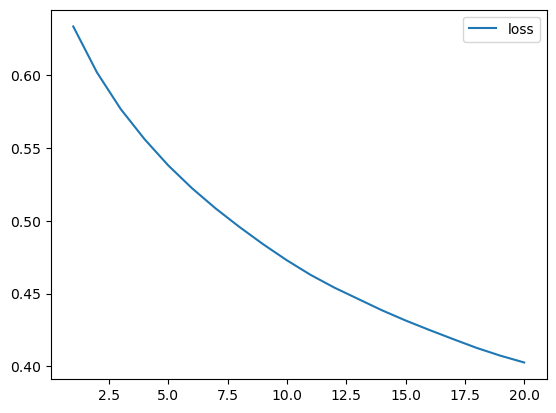

In [18]:
# Create a DataFrame containing training history
a5_df = pd.DataFrame(model_5.history)

# Increase the index by 1 to match the number of epochs
a5_df.index += 1

# Plot the loss
a5_df.plot(y="loss")
plt.show()

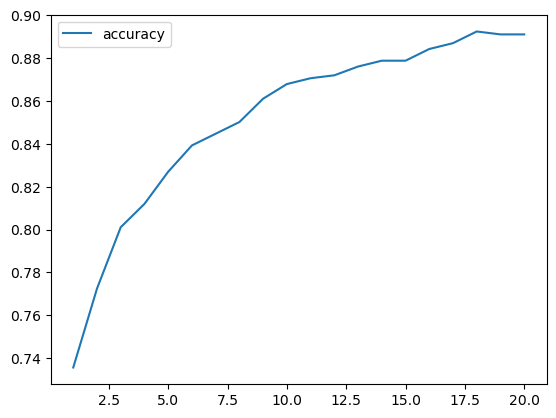

In [19]:
# Plot the accuracy
a5_df.plot(y="accuracy")
plt.show()

## Attempt #6 - 86.96% accuracy, 39.52% loss

### Changing number of epochs, 20 to 80
* In attempt #6 we used the same base architecture as attempt 4 to isolate epochs and control the other variables. Controlling those variables and keeping them the same would allows us to isolate the number of epochs and see if that would result in higher accuracy. An increased number of epochs gives the model more opportunities to learn from the data and adjust weights, but too many may overfit the model to the training dataset. As you can see, increasing the number of epochs from 20 to 80 yielded an increase in accuracy of about 1.5% over attempt #4, but was still unable to achieve the same results as attempt #3 with the hyperparamter tuner. 

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1


nn_model_6 = tf.keras.models.Sequential()

# First hidden layer
nn_model_6.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer

nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_6.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn_model_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
model_6 = nn_model_6.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.5887 - loss: 0.6744 
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.6829 - loss: 0.6348
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7714 - loss: 0.5877
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7810 - loss: 0.5663
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8043 - loss: 0.5326
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8460 - loss: 0.4865
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8135 - loss: 0.4973
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8485 - loss: 0.4728
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8714 - loss: 0.4449
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8589 - loss: 0.4403
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8631 - loss: 0.4349
Epoch 12/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/ste

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 8ms/step - accuracy: 0.8424 - loss: 0.4324
Loss: 0.43244120478630066, Accuracy: 0.842391312122345


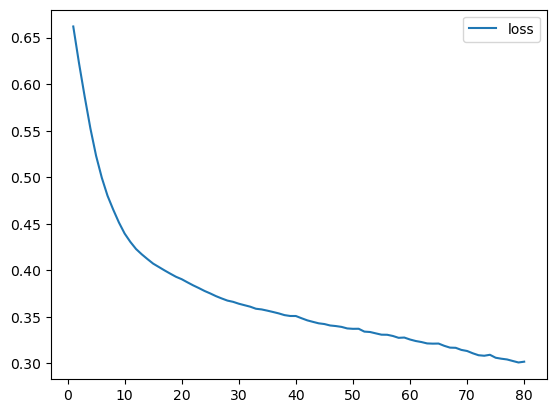

In [24]:
# Create a DataFrame containing training history
a6_df = pd.DataFrame(model_6.history)

# Increase the index by 1 to match the number of epochs
a6_df.index += 1

# Plot the loss
a6_df.plot(y="loss")
plt.show()

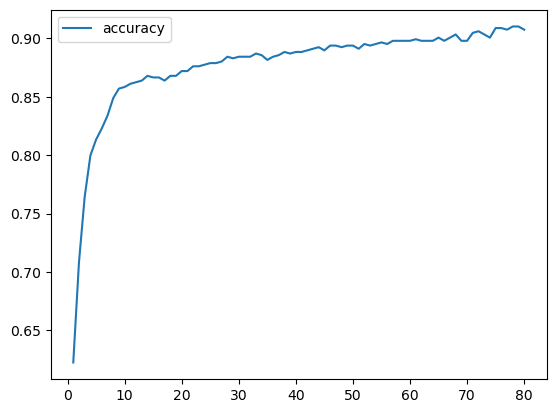

In [25]:
# Plot the accuracy
a6_df.plot(y="accuracy")
plt.show()

## Attempt #7 - 83.15% accuracy, 46.15% loss

### changing activation functions
* 1st hidden layer - tanh
* 2nd hidden layer - tanh
* 3rd hidden layer - relu
* 4th hidden layer - sigmoid
* 5th hidden layer - tanh
* 6th hidden layer - tanh
* output layer - sigmoid

* In attempt #7 we attempted to utilize different activation functions, such as relu and sigmoid in the hidden layers. This can affect how the model interprets and transforms the inputs. Different activation functions have different properties and can capture different types of non-linearities, that may better suit the problem at hand, potentially leading to increased accuracy. In this case, it did not yield an increase in accuracy over prior attempts

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1


nn_model_7 = tf.keras.models.Sequential()

# First hidden layer
nn_model_7.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Fifth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_7.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
nn_model_7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
model_7 = nn_model_7.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.4454 - loss: 0.7588 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.4443 - loss: 0.7479
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4529 - loss: 0.7337
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.4575 - loss: 0.7234
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.4442 - loss: 0.7204
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.4362 - loss: 0.7154
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.4618 - loss: 0.7034
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.4711 - loss: 0.6968
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.4281 - loss: 0.6966
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.4381 - loss: 0.6881
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.5433 - loss: 0.6790
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/ste

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 9ms/step - accuracy: 0.8207 - loss: 0.6018
Loss: 0.6018121242523193, Accuracy: 0.820652186870575


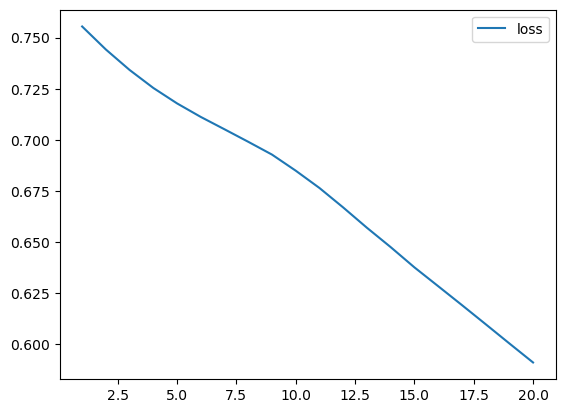

In [30]:
# Create a DataFrame containing training history
a7_df = pd.DataFrame(model_7.history)

# Increase the index by 1 to match the number of epochs
a7_df.index += 1

# Plot the loss
a7_df.plot(y="loss")
plt.show()

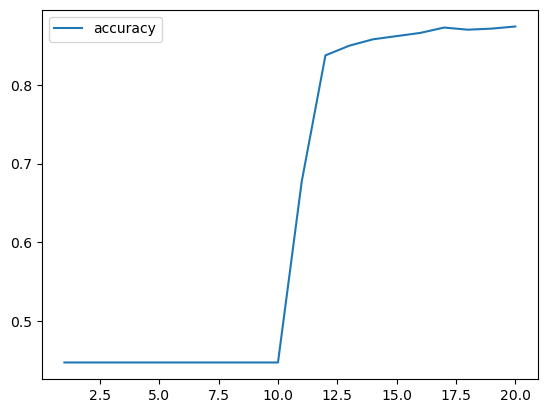

In [31]:
# Plot the accuracy
a7_df.plot(y="accuracy")
plt.show()

## Attempt 8 - 40.22% accuracy, 74.65% loss

### Changing the number of Neurons in each layer
* With attempt #8, we looked at the effect of increasing the number of neurons. All other variables we kept the same as attempt #4 to isolate the change in results. By increasing the number of neurons in a layer, the model can potentiallt capture more complex patterns in the data. This allows for better representation of the underlying relationships between the features and the target variable, potentially leading to higher accuracy. What we found in the results was actually a dramatic decrease in accuracy. It should be mentioned, that we are still utilizing tanh activation functions throughout the hidden layers, so maybe the decreased accuracy would be less with a more blended model, but by simply increasing the number of neurons the effect is clearly negative. 


In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 10
hidden_nodes_layer5 = 10
hidden_nodes_layer6 = 10


nn_model_8 = tf.keras.models.Sequential()

# First hidden layer
nn_model_8.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_8.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,321 (9.07 KB)

 Trainable params: 2,321 (9.07 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
nn_model_8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
model_8 = nn_model_7.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8751 - loss: 0.5791
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8748 - loss: 0.5734
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8478 - loss: 0.5740
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8514 - loss: 0.5610
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8637 - loss: 0.5479
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8860 - loss: 0.5287
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8857 - loss: 0.5207
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8780 - loss: 0.5139
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8701 - loss: 0.5128
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8659 - loss: 0.5083
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8867 - loss: 0.4859
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 14ms/step - accuracy: 0.3261 - loss: 0.7316
Loss: 0.7316298484802246, Accuracy: 0.32608696818351746


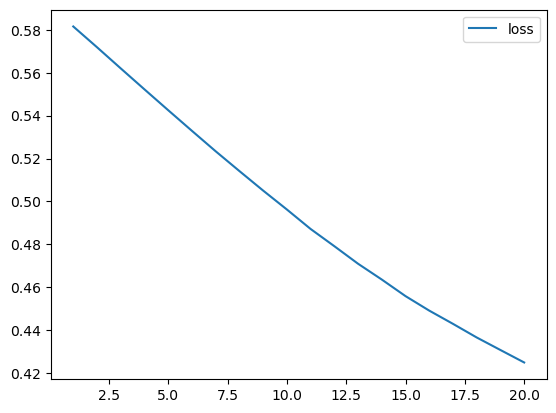

In [36]:
# Create a DataFrame containing training history
a8_df = pd.DataFrame(model_8.history)

# Increase the index by 1 to match the number of epochs
a8_df.index += 1

# Plot the loss
a8_df.plot(y="loss")
plt.show()

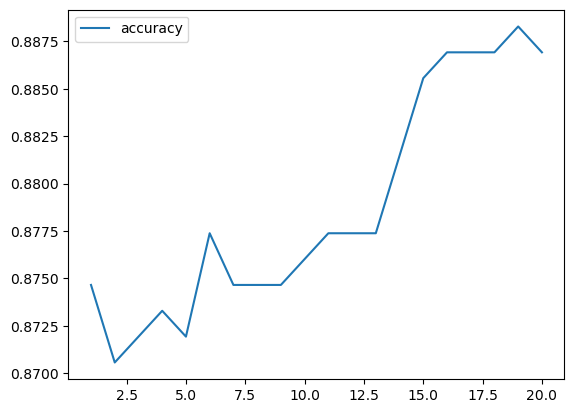

In [37]:
# Plot the accuracy
a8_df.plot(y="accuracy")
plt.show()

In [38]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model_9 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_9.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model_9.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model_9.add(tf.keras.layers.Dense(units=1, activation="tanh"))

    # Compile the model
    nn_model_9.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_9

In [39]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 00m 10s]
val_accuracy: 0.44565218687057495

Best val_accuracy So Far: 0.8804348111152649
Total elapsed time: 00h 27m 27s


In [41]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 41,
 'num_layers': 6,
 'units_0': 7,
 'units_1': 5,
 'units_2': 9,
 'units_3': 5,
 'units_4': 1,
 'units_5': 7,
 'units_6': 1,
 'units_7': 3,
 'units_8': 7,
 'units_9': 3,
 'tuner/epochs': 200,
 'tuner/initial_epoch': 67,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0206'}

In [42]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 16ms/step - accuracy: 0.8804 - loss: 0.8813
Loss: 0.8812618255615234, Accuracy: 0.8804348111152649


### logging attempts 
* 9.1 - 88.04% accuracy, 44.89% loss, 508 trials, 26 mins 49 secs
* 9.2 - 88.59% accuracy, 37.00% loss, 762 trials, 45 mins 24 secs
* 9.3 - 88.04% accuracy, 88.13% loss, 508 trials, 27 mins, 27 secs

* 11.1 - 92.93% accuracy: 47.41% loss, 508 trials, 1 hour, 14 mins, 21 secs

In [43]:
# Create a path reference to the file 
heart_path = Path("resources/heart.csv")



# Read CSV into DataFrame
df = pd.read_csv(heart_path, delimiter=",")

In [45]:
# Split our preprocessed data into our features and target arrays
y2 = df['HeartDisease']
X2 = df.drop(columns='HeartDisease')

In [46]:
# Convert categorical data to numeric with `pd.get_dummies`
X2= pd.get_dummies(X2)
# Drop the non-beneficial ID columns, 'HeartDisease'.

X2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [47]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify = y, test_size = .2)

In [48]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model_11 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_11.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model_11.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model_11.add(tf.keras.layers.Dense(units=1, activation="tanh"))

    # Compile the model
    nn_model_11.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_11

In [50]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 00m 19s]
val_accuracy: 0.44565218687057495

Best val_accuracy So Far: 0.929347813129425
Total elapsed time: 01h 14m 21s


In [52]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 71,
 'num_layers': 10,
 'units_0': 1,
 'units_1': 1,
 'units_2': 3,
 'units_3': 5,
 'units_4': 1,
 'units_5': 3,
 'units_6': 1,
 'units_7': 3,
 'units_8': 5,
 'units_9': 1,
 'tuner/epochs': 200,
 'tuner/initial_epoch': 67,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0458'}

In [53]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 22ms/step - accuracy: 0.9293 - loss: 0.4741
Loss: 0.4740946888923645, Accuracy: 0.929347813129425
